# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

def PolyCoefficients2(x, x0, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


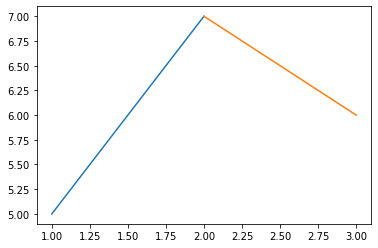

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Norma L_inf interpolacji: 0.235848747343683


Text(0.5, 1.0, 'Interpolacja za pomocą interpolacji barycentrycznej')

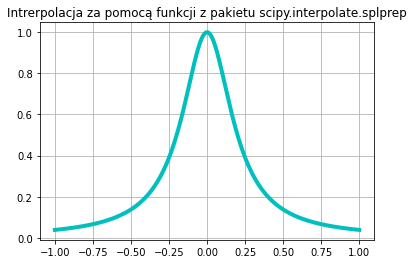

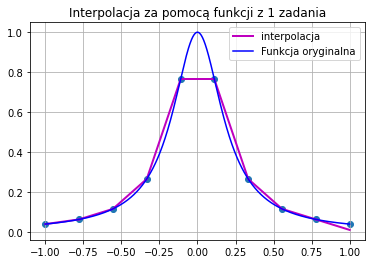

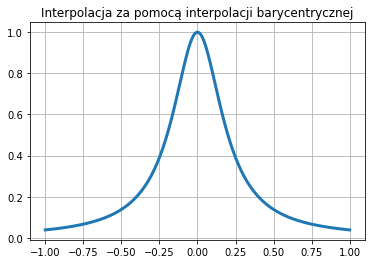

In [3]:
from scipy.interpolate import splprep, splev,barycentric_interpolate

x = np.linspace(-1,1,1000)
x_ = np.linspace(-1,1,10)
y = 1/(25*x**2 +1)
y_ = 1/(25*x_**2 +1)
F = lambda x: 1/(25*x**2 + 1)

#Scipy splprep

tck,u = splprep([x,y],s = 0)
new_points = splev(u,tck)
plt.plot(new_points[0],new_points[1],'c',linewidth = 4)
plt.grid()
plt.title("Intrerpolacja za pomocą funkcji z pakietu scipy.interpolate.splprep")
plt.figure()



#Funkcja z pierwszego zadania
a,b=main.first_spline(x_,y_)
f = [[b[i],a[i]] for i in range(len(a))]
y_abs = np.array([])
x_abs = np.array([])
for i in range(len(x_)-2):
    x_new = np.linspace(x_[i], x_[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]),'m',linewidth = 2)
    y_abs = np.append(y_abs, PolyCoefficients(x_new , f[i]))
    x_abs = np.append(x_abs, x_new)

x_new = np.linspace(x_[-2], x_[-1],1000)
plt.plot(x_new, PolyCoefficients(x_new, f[-2]),'m',linewidth = 2,label = "interpolacja")
y_abs = np.append(y_abs, PolyCoefficients(x_new , f[-1]))
x_abs = np.append(x_abs, x_new)
plt.scatter(x_,y_)
plt.grid()
plt.plot(x,y,'b',label = "Funkcja oryginalna")
plt.legend()
plt.title("Interpolacja za pomocą funkcji z 1 zadania")
plt.figure()

print("Norma L_inf interpolacji: {0}".format(main.L_inf(y_abs, F(x_abs))))
#Norma interpolacji jest zależna od ilości wybranych przez nas punktów interpolujących.Im więcej punktów tym lepsza jakosc intetrpolacji

#Barycentrczne
f = lambda x: 1/(25*x**2 +1)
x_ = np.linspace(-1,1,200)
interpolation_nodes_number = 400
xch = main.chebyshev_nodes(interpolation_nodes_number)
yimp = barycentric_interpolate(xch,f(xch),x_)
plt.plot(x_,yimp,linewidth = 3)
plt.grid()
plt.title("Interpolacja za pomocą interpolacji barycentrycznej")



***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Norma L_inf interpolacji: 0.00012949199283335266


Text(0.5, 1.0, 'Interpolacja za pomocą interpolacji barycentrycznej')

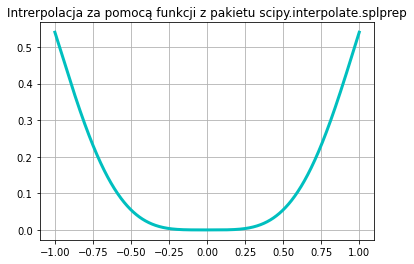

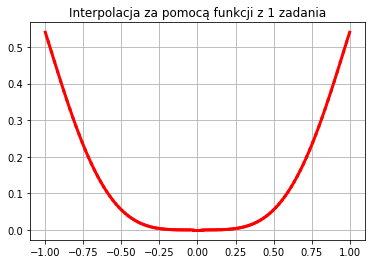

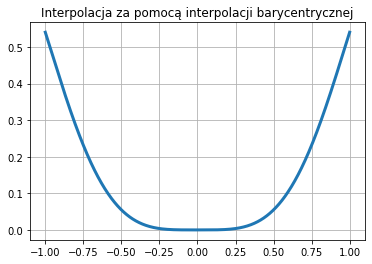

In [4]:
x = np.linspace(-1,1,1000)
x_ = np.linspace(-1,1,100)
y = np.cos(x)*x**4
y_ = np.cos(x_)*x_**4
F = lambda x: np.cos(x)*x**4
#splrep
tck,u = splprep([x,F(x)],s = 0)
new_points = splev(u,tck)
plt.plot(new_points[0],new_points[1],'c',linewidth = 3)

plt.grid()
plt.title("Intrerpolacja za pomocą funkcji z pakietu scipy.interpolate.splprep")
plt.figure()



#Funkcja z pierwszego zadania
a,b=main.first_spline(x_,F(x_))
f = [[b[i],a[i]] for i in range(len(a))]
y_abs = np.array([])
x_abs = np.array([])
for i in range(len(x_)-1):
    x_new = np.linspace(x_[i], x_[i+1],10)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]),'r',linewidth = 3)
    y_abs = np.append(y_abs, PolyCoefficients(x_new , f[i]))
    x_abs = np.append(x_abs, x_new)

plt.grid()
plt.title("Interpolacja za pomocą funkcji z 1 zadania")
plt.figure()
print("Norma L_inf interpolacji: {0}".format(main.L_inf(y_abs, F(x_abs))))



#Barycentrczne

f = lambda x: np.cos(x) * x**4
interpolation_nodes_number = 400
xch = main.chebyshev_nodes(interpolation_nodes_number)
yimp = barycentric_interpolate(xch,f(xch),x)
plt.plot(x,yimp,linewidth = 3)
plt.grid()
plt.title("Interpolacja za pomocą interpolacji barycentrycznej")






***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


[0.03846154 0.0384758  0.03849006 ... 0.03849006 0.0384758  0.03846154]
[-1.         -0.99977756 -0.99955511 ...  0.99955511  0.99977756
  1.        ]
Norma L_inf interpolacji: 0.14287413801237903


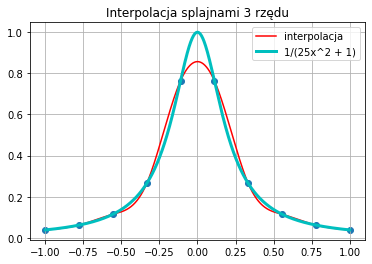

In [8]:
x = np.linspace(-1,1,1000)
y =  1/(25*x**2 +1)
x_ = np.linspace(-1,1,10)
y_ = 1/(25*x_**2+1)
F = lambda x: 1/(25*x**2 + 1)

#Funkcja z 4 zadania
b,c,d = main.cubic_spline(x_,y_)
f = [[y_[i],b[i],c[i],d[i]] for i in range(len(b))]
y_abs = np.array([])
x_abs = np.array([])
for i in range(len(x_)-2):
    x_new = np.linspace(x_[i],x_[i+1],1000)
    plt.plot(x_new, PolyCoefficients2(x_new, x_[i], f[i]),'r')
    plt.title("Interpolacja splajnami 3 rzędu")
    
    y_abs = np.append(y_abs, PolyCoefficients2(x_new ,x_[i], f[i]))
    x_abs = np.append(x_abs, x_new)
    
    
x_new = np.linspace(x_[-2],x_[-1],1000)
plt.plot(x_new,PolyCoefficients2(x_new, x_[-2], f[-1]),'r',label="interpolacja")
plt.scatter(x_,y_) 
plt.grid()    
plt.plot(x,y,'c',label = '1/(25x^2 + 1)',linewidth = 3)
y_abs = np.append(y_abs, PolyCoefficients2(x_new ,x_[-2], f[-1]))
x_abs = np.append(x_abs, x_new)

print("Norma L_inf interpolacji: {0}".format(main.L_inf(y_abs, F(x_abs))))
#Widać, że splajn kubiczny daje nam lepszą dokładność interpolacji niż funkcja sklejana pierwszego rzędu. 
# Również dla zwiększonej ilości punktów, otrzymujemy lepszą dokładność
plt.legend()


***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Norma L_inf interpolacji: 1.569862454575688e-05


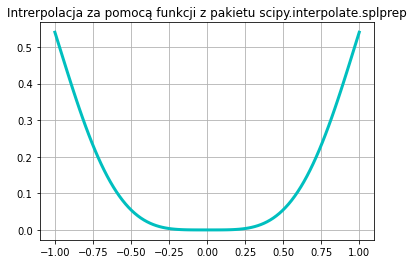

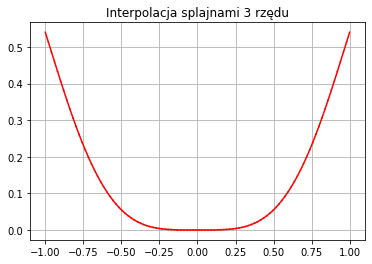

In [6]:
x = np.linspace(-1,1,100)
y = np.cos(x)*x**4
F = lambda x : np.cos(x)*x**4

#splrep
tck,u = splprep([x,y],s = 0)
new_points = splev(u,tck)
plt.plot(new_points[0],new_points[1],'c',linewidth = 3)
plt.grid()
plt.title("Intrerpolacja za pomocą funkcji z pakietu scipy.interpolate.splprep")
plt.figure()


#Funkcja z 4 zadania
y_abs = np.array([])
x_abs = np.array([])
b,c,d = main.cubic_spline(x,F(x))
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients2(x_new, x[i], f[i]),'r')
    plt.title("Interpolacja splajnami 3 rzędu")
    y_abs = np.append(y_abs, PolyCoefficients2(x_new ,x[i], f[i]))
    x_abs = np.append(x_abs, x_new)
print("Norma L_inf interpolacji: {0}".format(main.L_inf(y_abs, F(x_abs))))
plt.grid()
#Kolejny raz możemy zuważyć przewage dokładności interpolacji funkcji sklejanej 3 rzędu nad funkcją sklejaną 1 rzędu.
#Jednak musimy pamiętać o tym, że jest ona widocznie wolniejsza

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

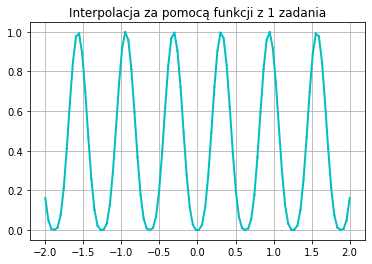

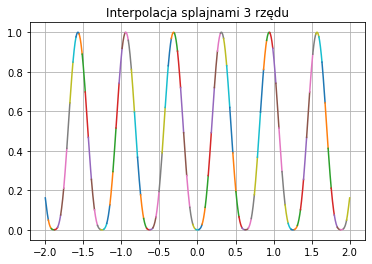

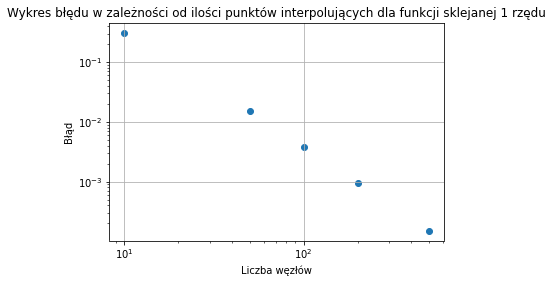

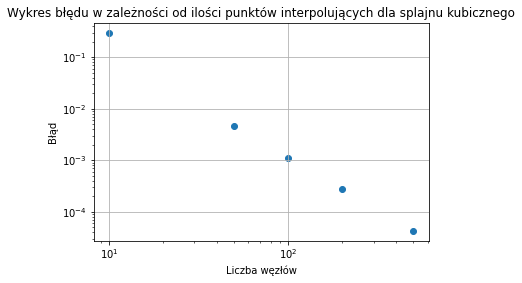

In [7]:
x = np.linspace(-2,2,100)
y = np.abs(np.sin(5*x))**3

#Funkcja z 1 zadania
a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]),'c',linewidth = 2)
plt.grid()

plt.title("Interpolacja za pomocą funkcji z 1 zadania")
plt.figure()


b,c,d = main.cubic_spline(x,y)
f = [[y[i],b[i],c[i],d[i]] for i in range(len(b))]
for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients2(x_new, x[i], f[i]))
    plt.title("Interpolacja splajnami 3 rzędu")
plt.grid()

inter_lvl1 = [10,50,100,200,500]
F = lambda x: np.abs(np.sin(5*x))**3
error1 = []
error2 = []

for N in inter_lvl1:
    x_i = np.linspace(-1, 1, N)
    y_i = F(x_i)
    Y = np.array([]) #Przechowuje całość interpolowanej funkcji 
    X = np.array([])

    a,b=main.first_spline(x_i,y_i)
    f = [[b[i],a[i]] for i in range(len(a))]

    for i in range(len(x_i)-1):
        x_new = np.linspace(x_i[i], x_i[i+1],1000)
        y_new = PolyCoefficients(x_new, f[i])

        Y = np.append(Y, y_new)
        X = np.append(X, x_new)

    error1.append(main.L_inf(Y, F(X)))

plt.figure()
plt.scatter(inter_lvl1, error1)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od ilości punktów interpolujących dla funkcji sklejanej 1 rzędu")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()




for N in inter_lvl1:
    x_i = np.linspace(-1, 1, N)
    y_i = F(x_i)
    Y = np.array([]) #Przechowuje całość interpolowanej funkcji 
    X = np.array([])

    b,c,d = main.cubic_spline(x_i,y_i)
    f = [[y_i[i],b[i],c[i],d[i]] for i in range(len(b))]

    for i in range(len(x_i)-1):
        x_new = np.linspace(x_i[i], x_i[i+1],1000)
        y_new = PolyCoefficients2(x_new, x_i[i], f[i])

        Y = np.append(Y, y_new)
        X = np.append(X, x_new)

    error2.append(main.L_inf(Y, F(X)))

plt.figure()
plt.scatter(inter_lvl1, error2)
plt.xscale("log")
plt.yscale("log")
plt.title("Wykres błędu w zależności od ilości punktów interpolujących dla splajnu kubicznego")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd")
plt.grid()
plt.show()




Na tym laboratorium głównym celem było zapoznanie się oraz przyswojenie sobie sposobu korzystania z przybliżenia funkcji tzw. splajnami, czyli funkcjami wielomianowymi różnego rzędu (w naszym przypadku 1-go i 3-go).Zgodnie z z moimi przypuszczeniami  splajny 3-go stopnia lepiej przybliżają funkcję, co widać w ostatnim zadaniu. Dodatkowo zaletą wielomianów 3-go stopnia jest to, że ich przebieg jest krzywą o dowolnych zaokrągleniach, a to sprawia, że na łączeniach przedziałów, gdzie poprzedni wielomian łączy się z następnym unikamy "ostrych" krawędzi.